* **skleran.model_selection.cross_val_score** - Evaluate a score by cross validation.


* **sklearn.model_selection.cross_val_predict** - Generate cross-validated estimates for each input data point.


* **sklearn.metrics.mean_squared_log_error** - Mean squared logarithmic error regression loss.


* **sklearn.impute.SimpleImputer** - Univariate imputer for completing missing values with simple strategies.

In [4]:
#Importing the necessary libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer

In [5]:
data_train = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\House Price\\train.csv')
data_test = pd.read_csv('D:\\SLIIT\\3rd year 2nd sem\\Machine Learning amd Optimization Methods\\Coding\\House Price\\test.csv')

In [7]:
data_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [9]:
data_test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [10]:
data_train.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1340,1341,20,RL,70.0,8294,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2007,WD,Normal,123000
1361,1362,20,RL,124.0,16158,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,260000
55,56,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,180500


In [11]:
data_test.sample(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
521,1982,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
768,2229,60,RL,107.0,12852,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,New,Partial
1005,2466,50,RL,60.0,8550,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2007,ConLw,Family


In [12]:
print('Shape train: %s, test: %s' % (data_train.shape,data_test.shape))

Shape train: (1460, 81), test: (1459, 80)


* There are ~1500 records with 80 features.

In [14]:
pd.options.display.max_columns = None #show all cols
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Missing Data

* From the above we can see any missing values (in the numeric fields), that will later need imputing and any significant outliers will also need to be dealt with. For example "LotFrontage" is missing on 259 rows. The max sales price is over 7 standard deviations from the mean which would suggest outliers.

In [16]:
data_na = (data_train.isnull().sum() / len(data_train)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio':data_na})
missing_data.head(10)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


## Target analysis

* Target distribution is skewed and can be seen in the plots below - this is generally not a good thing. So we will need to adjust it so its normally distributed. This can be achieved with a log transform or something more powerful like box cox.

C:\Users\binur\AppData\Local\Temp\ipykernel_11592\4103757872.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['SalePrice'],ax=ax[0],fit=norm)
C:\Users\binur\AppData\Local\Temp\ipykernel_11592\4103757872.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data_train[('SalePri

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

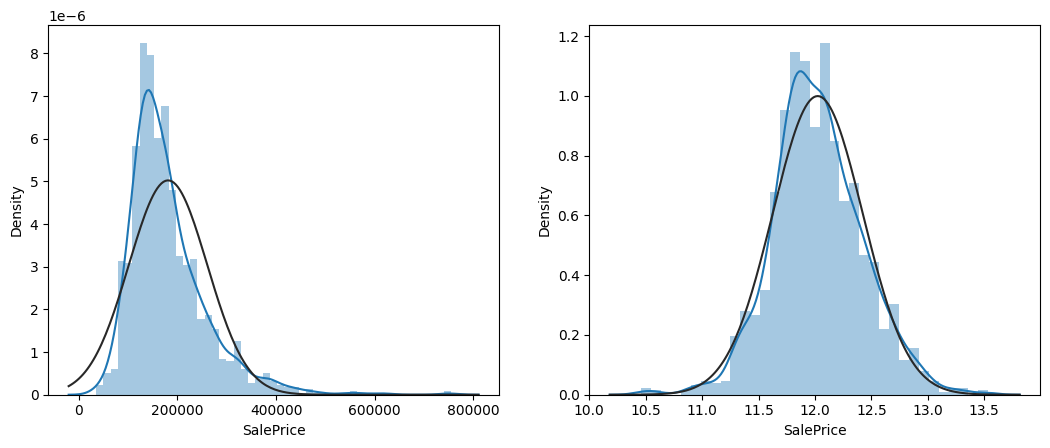

In [21]:
fig,ax = plt.subplots(1,2)
width,height =fig.get_size_inches()
fig.set_size_inches(width*2,height)
sns.distplot(data_train['SalePrice'],ax=ax[0],fit=norm)
sns.distplot(np.log(data_train[('SalePrice')] + 1),ax=ax[1],fit=norm)

* On the diagram above, the left pane shows the original(skewed) data and the right pane show the transformed data.

# Data Engineering

* We have to do some work to get the data into a format that will work with LightGBM. This covers:
1. Handling categoricals
2. Handling numericals
3. Feature engineering - To generate new features

## Basic data engineering 

In [22]:
def fill_missing(data,cols,val):
    #Fill the supplied val
    for col in cols:
        data[col] = data[col].fillna(val)

In [24]:
def fill_missing_with_mode(data,cols):
    #Fill with the mode
    for col in cols:
        data[col] = data[col].fillna(data[col].mode()[0])

In [25]:
def addlogs(res,cols):
    #Log transform feature list
    m = res.shape[1]
    for c in cols:
        res = res.assign(newcol=pd.Series(np.log(1.01 + res[c])).values)
        res.columns.values[m] = c + '_log'
        m += 1
    return res

In [26]:
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['1stFlrSF'] + data_train['2ndFlrSF']

In [27]:
loglist = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea', 'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
            'TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','YearRemodAdd','TotalSF']
data_train = addlogs(data_train,loglist)

In [28]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,LotFrontage_log,LotArea_log,MasVnrArea_log,BsmtFinSF1_log,BsmtFinSF2_log,BsmtUnfSF_log,TotalBsmtSF_log,1stFlrSF_log,2ndFlrSF_log,LowQualFinSF_log,GrLivArea_log,BsmtFullBath_log,BsmtHalfBath_log,FullBath_log,HalfBath_log,BedroomAbvGr_log,KitchenAbvGr_log,TotRmsAbvGrd_log,Fireplaces_log,GarageCars_log,GarageArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,MiscVal_log,YearRemodAdd_log,TotalSF_log
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566,4.189806,9.042041,5.283254,6.561045,0.009950,5.017346,6.753450,6.753450,6.751113,0.00995,7.444839,0.698135,0.009950,1.101940,0.698135,1.388791,0.698135,2.198335,0.009950,1.101940,6.308117,0.009950,4.127296,0.009950,0.00995,0.00995,0.00995,0.00995,7.602905,7.850497
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524,4.394573,9.169624,0.009950,6.886542,0.009950,5.652524,7.141253,7.141253,0.009950,0.00995,7.141253,0.009950,0.698135,1.101940,0.009950,1.388791,0.698135,1.947338,0.698135,1.101940,6.133420,5.700477,0.009950,0.009950,0.00995,0.00995,0.00995,0.00995,7.589341,7.834000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706,4.234251,9.328213,5.093812,6.188285,0.009950,6.075369,6.825471,6.825471,6.765051,0.00995,7.488299,0.698135,0.009950,1.101940,0.698135,1.388791,0.698135,1.947338,0.698135,1.101940,6.411835,0.009950,3.761433,0.009950,0.00995,0.00995,0.00995,0.00995,7.602406,7.903600
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473,4.111038,9.164402,0.009950,5.379943,0.009950,6.293438,6.629376,6.869025,6.629376,0.00995,7.448922,0.698135,0.009950,0.698135,0.009950,1.388791,0.698135,2.080691,0.698135,1.388791,6.466160,0.009950,3.583797,5.609508,0.00995,0.00995,0.00995,0.00995,7.586301,7.813596
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12

* **numpy.log1p** - Return the natural logarithm of one plus the input array, element-wise. Calculates log(1 + x).

In [30]:
data_train['SalePrice'] = np.log1p(data_train['SalePrice'])

* Imputing the missing values with something sensible.

In [32]:
fill_missing(data_train,["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", 
                       "GarageCond", 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"MasVnrType", 
                       "MSSubClass"], "None")

fill_missing(data_train,["GarageYrBlt", "GarageArea", "GarageCars", 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 
                         'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"], 0)

fill_missing_with_mode(data_train, ["MSZoning", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"])
fill_missing(data_train,['Functional'],'Typ')

In [33]:
#Utils has only one row with a value so it is removed
data_train.drop(['Utilities'],axis=1,inplace=True)

In [35]:
# For lot frontage we take the median of the neighbourhood. In general this would be a good approximation as most 
# house co located are similar in size 
data_train['LotFrontage'] = data_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [37]:
#Removing the outliers
data_train.drop(data_train[(data_train['OverallQual'] < 5) & (data_train['SalePrice'] > 200000)].index,inplace=True)
data_train.drop(data_train[(data_train['GrLivArea'] > 4000) & (data_train['SalePrice'] > 300000)].index,inplace=True)
data_train.reset_index(drop=True,inplace=True)

* There are some fields that are categorical and we should not treat them as numbers. So we have to convert non-numeric -> string where approriate

In [38]:
data_train['MSSubClass'] = data_train['MSSubClass'].apply(str)
data_train['YrSold'] = data_train['YrSold'].astype(str)
data_train['MoSold'] = data_train['MoSold'].astype(str)

## Handling categoricals

In [39]:
def fix_missing_cols(in_train, in_test):
    missing_cols = set(in_train.columns) - set(in_test.columns)
    # Add a missing column in test set with default value equal to 0
    for c in missing_cols:
        in_test[c] = 0
    # Ensure the order of column in the test set is in the same order than in train set
    in_test = in_test[in_train.columns]
    return in_test

In [40]:
def dummy_encode(in_df_train, in_df_test):
    df_train = in_df_train
    df_test = in_df_test
    categorical_feats = [
        f for f in df_train.columns if df_train[f].dtype == 'object'
    ]
    print(categorical_feats)
    for f_ in categorical_feats:
        prefix = f_
        df_train = pd.concat([df_train, pd.get_dummies(df_train[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = pd.concat([df_test, pd.get_dummies(df_test[f_], prefix=prefix)], axis=1).drop(f_, axis=1)
        df_test = fix_missing_cols(df_train, df_test)
    return df_train, df_test

In [41]:
data_train,data_test = dummy_encode(data_train,data_test)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [42]:
print('Shape train: %s, test: %s' % (data_train.shape,data_test.shape))

Shape train: (1460, 362), test: (1459, 362)


# Additional Feature Engineering

* Additional daa engineering often involves some complex computations. For small data sets like this its not a problem. For larger data sets you need to verify the performance vs the change in performance / accuracy after adding the features. This should be in terms of both accuracy and time to train. If there is a real benefit, then these can be applied but could be perhaps be done as a pre procesing step (eg via a Spark Job). This depends on the feature / data but the point is to ensure you test with and without the new feature.

## Interaction Terms

* First generate some interaction terms based on the highest correlated features which were pre-computed.

In [49]:
def load_poly_features(df_train, df_test, cols):
    #USeful function to generate poly terms
    #:param df_train: The training data frame
    #:param df_test: The test data frame
    #:return: df_poly_features, df_poly_features_test - The training polynomial features + the test
    
    print('Loading polynomial features..')
    # Make a new dataframe for polynomial features
    poly_features = df_train[cols]
    poly_features_test = df_test[cols]

    # imputer for handling missing values
    imputer = SimpleImputer(strategy='median')

    # Need to impute missing values
    poly_features = imputer.fit_transform(poly_features)
    poly_features_test = imputer.transform(poly_features_test)

    # Create the polynomial object with specified degree
    poly_transformer = PolynomialFeatures(degree=3)
    # Train the polynomial features
    poly_transformer.fit(poly_features)

    # Transform the features
    poly_features = poly_transformer.transform(poly_features)
    poly_features_test = poly_transformer.transform(poly_features_test)
    print('Polynomial Features shape: %s' % str(poly_features.shape))

    df_poly_features = pd.DataFrame(poly_features,
                                    columns=poly_transformer.get_feature_names(cols))
    df_poly_features_test = pd.DataFrame(poly_features_test,
                                         columns=poly_transformer.get_feature_names(cols))
    df_poly_features['Id'] = df_train['Id']
    df_poly_features_test['Id'] = df_test['Id']
    print('Loaded polynomial features')
    return df_poly_features, df_poly_features_test

In [50]:
correlated_cols = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF']
data_train_poly, data_test_poly = load_poly_features(data_train,data_test,cols=correlated_cols)
print('Shape train: %s, test: %s' % (data_train_poly.shape,data_test_poly.shape))

Loading polynomial features..
Polynomial Features shape: (1460, 84)
Loaded polynomial features
Shape train: (1460, 85), test: (1459, 85)


C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
data_train = data_train.merge(right=data_train_poly.reset_index(),how='left',on='Id')
data_test = data_test.merge(right=data_test_poly.reset_index(),how='left',on='Id')

In [52]:
print('Shape train: %s, test: %s' % (data_train.shape,data_test.shape))

Shape train: (1460, 447), test: (1459, 447)


In [54]:
y = data_train['SalePrice']
y.sample(3)

120    2.572667
101    2.571814
867    2.546909
Name: SalePrice, dtype: float64

In [55]:
y

0       2.583824
1       2.573300
2       2.589054
3       2.553297
4       2.597433
          ...   
1455    2.570514
1456    2.584365
1457    2.602181
1458    2.554469
1459    2.557351
Name: SalePrice, Length: 1460, dtype: float64

In [56]:
data_train.drop(['SalePrice'],axis=1,inplace=True)
data_test.drop(['SalePrice'],axis=1,inplace=True)

In [57]:
print('Shape train: %s, test: %s' % (data_train.shape,data_test.shape))

Shape train: (1460, 446), test: (1459, 446)


In [58]:
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(data_train,y,test_size=0.2,random_state=42)

In [59]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000
}

In [60]:
#Creating the model
gbm = lgb.LGBMRegressor(**hyper_params)

In [61]:
#Training the model
gbm.fit(x_train,y_train,eval_set=[(x_test,y_test)],eval_metric='l1',early_stopping_rounds=1000)

C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\binur\anaconda3\envs\tfradeon\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] feature_fraction is set=0.9, col

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l1', 'l2'], num_iterations=100000, num_leaves=128,
              objective='regression', task='train', verbose=0)

In [62]:
y_pred = gbm.predict(x_train,num_iterations=gbm.best_iteration_)
y_pred

array([2.55725928, 2.57257878, 2.51892986, ..., 2.53844602, 2.57409845,
       2.57480827])

In [63]:
#Checking the model accuracy
print('The rmse of prediction is:',round(mean_squared_log_error(y_pred,y_train) ** 0.5,5))

The rmse of prediction is: 0.0014
